<h2 style="color:Black;">Module Code: CSMAD</h2>

<h3 style="color:Black;">Assignment report Title: Exploratory Data Analysis on Bicycle Journeys</h3>

<h3 style="color:Black;">Student Number: 32822955</h3>

<h3 style="color:Black;">Actual hrs spent for the assignment: 24 hrs</h3>

<hr style="border:2px solid black"> </hr>

## Table of Contents
* [Overview of the data and summarising](#overview)
* [Data Cleaning](#Data_Cleaning)
* [Data Transformation](#Data_Transformation)
* [Data Visualisation](#Visualisation)
* [Summary and References](#Conclusion)

<hr style="border:1px solid black"> </hr>
<h2 style="color:Black;">1. Overview and Summarising of the data</h2>

The following libraries are imported for accurate data analysis:
- pandas is used for data manipulation and analysis
- numpy is used for numerical operations
- matplotlib and seaborn are used for data visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

************************
1.1. Load the Metro.csv data, and then display the first 5 rows.

In [2]:
metro_data = pd.read_csv('Downloads/metro.csv', low_memory=False)
metro_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


******************************************
1.2. Display the information of the Bicycle Journeys dataset to find out:

- how many records are there in this dataset?
- how many attributes are there and what are the data types?
- are there any missing values?

In [3]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              92124 non-null  int64  
 1   duration             92124 non-null  int64  
 2   start_time           92124 non-null  object 
 3   end_time             92124 non-null  object 
 4   start_station        92124 non-null  int64  
 5   start_lat            89985 non-null  float64
 6   start_lon            89985 non-null  float64
 7   end_station          92124 non-null  int64  
 8   end_lat              88052 non-null  float64
 9   end_lon              88052 non-null  float64
 10  bike_id              92124 non-null  object 
 11  plan_duration        92124 non-null  int64  
 12  trip_route_category  92124 non-null  object 
 13  passholder_type      92124 non-null  object 
 14  bike_type            92124 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

- Data in "Metro.csv" Dataset contain 92124 entries with 15 data columns, have different data types float, integer and object. 
- The start_time and end_time have object as current datatype this will be converted to time_stamp datatype, and bike_id column has object as datatype, this will be converted to string in data cleaning method.
- The trip_route_category, passholder_type and bike_type has object as datatype, this will be converted to category in data transformation method.

********************************************
1.3.1 Display the descriptive statistics of the Bicycle Journeys dataset 
- For numerical variables, and the columns with other forms of data are omitted

In [4]:
metro_data.describe().round(3)

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,9.212400e+04,92124.000,92124.000,89985.000,89985.000,92124.000,88052.000,88052.000,92124.000
mean,1.274286e+08,33.169,3484.900,34.035,-118.288,3480.271,34.035,-118.287,60.291
std,1.524134e+06,129.058,611.484,0.059,0.074,609.943,0.059,0.073,111.141
min,1.246571e+08,1.000,3000.000,33.711,-118.495,3000.000,33.711,-118.495,1.000
25%,1.261375e+08,6.000,3029.000,34.036,-118.281,3028.000,34.037,-118.281,1.000
50%,1.274911e+08,12.000,3062.000,34.047,-118.259,3062.000,34.047,-118.259,30.000
75%,1.287379e+08,22.000,4285.000,34.052,-118.248,4285.000,34.052,-118.248,30.000
max,1.303877e+08,1440.000,4453.000,34.178,-118.231,4453.000,34.178,-118.231,999.000


********************************************
1.3.2 Display the descriptive statistics for each bike type.

In [5]:
metro_data.groupby(metro_data['bike_type']).describe().round(2)

trip_id                                                       \
             count          mean         std          min           25%   
bike_type                                                                 
electric   46446.0  1.273903e+08  1479619.23  124657587.0  1.261552e+08   
smart      16201.0  1.275515e+08  1495830.65  124669421.0  1.263409e+08   
standard   29477.0  1.274215e+08  1603164.64  124657107.0  1.259695e+08   

                                                 duration         ... end_lon  \
                   50%          75%          max    count   mean  ...     75%   
bike_type                                                         ...           
electric   127380028.5  128660960.5  130387712.0  46446.0  30.57  ... -118.25   
smart      127708502.0  128799444.0  130053157.0  16201.0  45.53  ... -118.42   
standard   127507133.0  128840740.0  130161861.0  29477.0  30.47  ... -118.24   

                  plan_duration                                               
              max         count   mean     std  min   25%   50%   75%    max  
bike_type                                                                     
electric  -118.23       46446.0  61.09  104.05  1.0  30.0  30.0  30.0  365.0  
smart     -118.35       16201.0  60.62  130.95  1.0   1.0   1.0  30.0  999.0  
standard  -118.23       29477.0  58.85  110.09  1.0   1.0  30.0  30.0  365.0  

[3 rows x 72 columns]

********************************************
1.3.3 Display the descriptive statistics for each pass holder type.

In [6]:
metro_data.groupby(metro_data['passholder_type']).describe().round(2)

trip_id                                                       \
                   count          mean         std          min           25%   
passholder_type                                                                 
Annual Pass       6220.0  1.274519e+08  1529934.16  124675941.0  1.261148e+08   
Flex Pass            6.0  1.251321e+08   439554.50  124706779.0  1.248929e+08   
Monthly Pass     57175.0  1.275499e+08  1519157.38  124657107.0  1.263153e+08   
One Day Pass      5175.0  1.277984e+08  1324506.56  124726206.0  1.268643e+08   
Testing             46.0  1.277445e+08  1598084.60  124753014.0  1.264302e+08   
Walk-up          23502.0  1.270460e+08  1505612.81  124659747.0  1.257643e+08   

                                                        duration         ...  \
                         50%           75%          max    count   mean  ...   
passholder_type                                                          ...   
Annual Pass      127408788.5  1.288251e+08  130053112.0   6220.0  15.66  ...   
Flex Pass        124906983.5  1.254782e+08  125715146.0      6.0   7.33  ...   
Monthly Pass     127661378.0  1.288571e+08  130387712.0  57175.0  15.85  ...   
One Day Pass     127835301.0  1.289592e+08  130161467.0   5175.0  79.55  ...   
Testing          128184586.0  1.290510e+08  129949550.0     46.0  29.61  ...   
Walk-up          126927949.0  1.282520e+08  130161861.0  23502.0  69.72  ...   

                end_lon         plan_duration                                \
                    75%     max         count    mean     std    min    25%   
passholder_type                                                               
Annual Pass     -118.25 -118.23        6220.0  365.00    0.00  365.0  365.0   
Flex Pass       -118.24 -118.24           6.0  365.00    0.00  365.0  365.0   
Monthly Pass    -118.25 -118.23       57175.0   30.00    0.00   30.0   30.0   
One Day Pass    -118.26 -118.23        5175.0    1.00    0.00    1.0    1.0   
Testing         -118.40 -118.35          46.0  999.00    0.00  999.0  999.0   
Walk-up         -118.25 -118.23       23502.0   64.48  138.11    1.0    1.0   

                                      
                   50%    75%    max  
passholder_type                       
Annual Pass      365.0  365.0  365.0  
Flex Pass        365.0  365.0  365.0  
Monthly Pass      30.0   30.0   30.0  
One Day Pass       1.0    1.0    1.0  
Testing          999.0  999.0  999.0  
Walk-up            1.0    1.0  365.0  

[6 rows x 72 columns]

********************************************
1.3.4 Display the descriptive statistics for each start station.

In [7]:
metro_data.groupby(metro_data['start_station']).describe().round(2)

trip_id                                                       \
                count          mean         std          min           25%   
start_station                                                                
3000            144.0  1.273567e+08  1466920.92  124691541.0  1.264211e+08   
3005           4512.0  1.273035e+08  1517613.70  124678322.0  1.260220e+08   
3006           2269.0  1.274016e+08  1534676.28  124678955.0  1.260516e+08   
3007           1525.0  1.273605e+08  1541612.84  124673775.0  1.260492e+08   
3008           1092.0  1.272774e+08  1556204.05  124682001.0  1.259321e+08   
...               ...           ...         ...          ...           ...   
4443             56.0  1.294797e+08   287114.91  128974157.0  1.292728e+08   
4444             61.0  1.296686e+08   185168.59  129337764.0  1.294986e+08   
4445             22.0  1.297001e+08   221439.41  129309386.0  1.295179e+08   
4449             10.0  1.299113e+08    91766.57  129793520.0  1.298393e+08   
4453              8.0  1.298175e+08   111022.16  129714058.0  1.297142e+08   

                                                      duration         ...  \
                       50%           75%          max    count   mean  ...   
start_station                                                          ...   
3000           127356385.5  1.284561e+08  130021610.0    144.0  49.44  ...   
3005           127266060.0  1.286052e+08  130387434.0   4512.0  23.36  ...   
3006           127490175.0  1.287208e+08  130387563.0   2269.0  21.68  ...   
3007           127366254.0  1.286288e+08  130387712.0   1525.0  22.53  ...   
3008           127217377.5  1.286405e+08  130028927.0   1092.0  22.47  ...   
...                    ...           ...          ...      ...    ...  ...   
4443           129476032.5  1.297154e+08  130025952.0     56.0  14.09  ...   
4444           129673560.0  1.298019e+08  130036364.0     61.0  73.49  ...   
4445           129710076.0  1.299000e+08  130020971.0     22.0  16.64  ...   
4449           129912744.0  1.299992e+08  130025337.0     10.0  22.40  ...   
4453           129798913.0  1.298782e+08  130021871.0      8.0  37.25  ...   

              end_lon         plan_duration                               \
                  75%     max         count    mean     std   min    25%   
start_station                                                              
3000          -118.36 -118.23         144.0  182.27  218.77   1.0  22.75   
3005          -118.25 -118.23        4512.0   62.19  105.80   1.0  30.00   
3006          -118.25 -118.23        2269.0   43.78   74.43   1.0  30.00   
3007          -118.25 -118.23        1525.0   99.69  141.14   1.0  30.00   
3008          -118.25 -118.23        1092.0   53.27   96.95   1.0  30.00   
...               ...     ...           ...     ...     ...   ...    ...   
4443          -118.26 -118.24          56.0   30.00    0.00  30.0  30.00   
4444          -118.29 -118.28          61.0   42.20   74.74   1.0  30.00   
4445          -118.25 -118.24          22.0   49.91  102.92   1.0   1.00   
4449          -118.27 -118.25          10.0   12.60   14.98   1.0   1.00   
4453          -118.28 -118.24           8.0  239.38  173.38  30.0  30.00   

                                    
                 50%    75%    max  
start_station                       
3000            30.0  365.0  999.0  
3005            30.0   30.0  365.0  
3006            30.0   30.0  365.0  
3007            30.0   30.0  365.0  
3008            30.0   30.0  365.0  
...              ...    ...    ...  
4443            30.0   30.0   30.0  
4444            30.0   30.0  365.0  
4445            30.0   30.0  365.0  
4449             1.0   30.0   30.0  
4453           365.0  365.0  365.0  

[183 rows x 64 columns]

********************************************
1.4 Computing pairwise correlation of columns, excluding NA/null values.

In [8]:
metro_data.corr(numeric_only=True)

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
trip_id,1.000000,-0.023193,0.060813,0.076327,-0.022278,0.059470,0.077371,-0.023173,-0.016951
duration,-0.023193,1.000000,0.104422,-0.060742,-0.069049,0.055428,-0.081130,-0.085812,0.040973
start_station,0.060813,0.104422,1.000000,-0.264508,-0.722475,0.770185,-0.259582,-0.690297,-0.023934
start_lat,0.076327,-0.060742,-0.264508,1.000000,0.214002,-0.258373,0.984679,0.199597,0.087009
start_lon,-0.022278,-0.069049,-0.722475,0.214002,1.000000,-0.686993,0.197523,0.983414,0.038780
end_station,0.059470,0.055428,0.770185,-0.258373,-0.686993,1.000000,-0.260053,-0.718105,-0.039127
end_lat,0.077371,-0.081130,-0.259582,0.984679,0.197523,-0.260053,1.000000,0.205221,0.078596
end_lon,-0.023173,-0.085812,-0.690297,0.199597,0.983414,-0.718105,0.205221,1.000000,0.028340
plan_duration,-0.016951,0.040973,-0.023934,0.087009,0.038780,-0.039127,0.078596,0.028340,1.000000


**********************************************
1.5 Utilising Seaborn Heatmap to display visualisation of paired correlation of columns.

<Axes: >

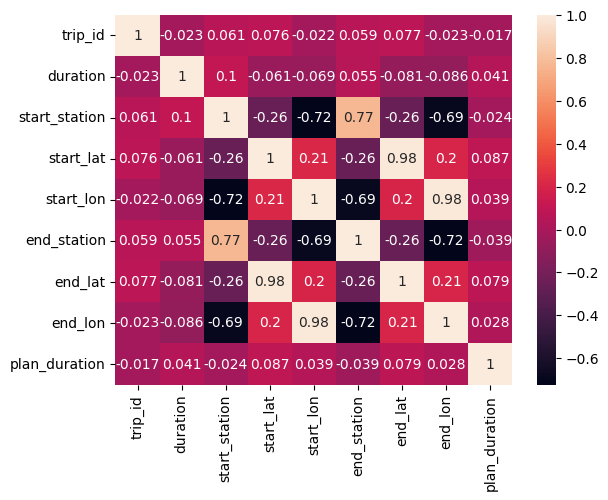

In [9]:
sns.heatmap(metro_data.corr(numeric_only=True), annot=True)   # annot=True to show the correlation values as annotation

<hr style="border:1.5px solid black"> </hr>
<h2 style="color:Black;">2. Data Cleansing</h2>

- Identification
- Explanation
- Handling missing data
- Handling outliers and
- Other irregularities .

****************************************
2.1 Changing the datatype of start_time, end_time and bike_id

In [10]:
#Change datatype
metro_data['start_time'] = pd.to_datetime(metro_data['start_time'])
metro_data['end_time'] = pd.to_datetime(metro_data['end_time'])
metro_data['bike_id'] = metro_data['bike_id'].astype('string')

#Check datatype
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              92124 non-null  int64         
 1   duration             92124 non-null  int64         
 2   start_time           92124 non-null  datetime64[ns]
 3   end_time             92124 non-null  datetime64[ns]
 4   start_station        92124 non-null  int64         
 5   start_lat            89985 non-null  float64       
 6   start_lon            89985 non-null  float64       
 7   end_station          92124 non-null  int64         
 8   end_lat              88052 non-null  float64       
 9   end_lon              88052 non-null  float64       
 10  bike_id              92124 non-null  string        
 11  plan_duration        92124 non-null  int64         
 12  trip_route_category  92124 non-null  object        
 13  passholder_type      92124 non-

****************************************
2.2 Identifying duplicate values

In [11]:
metro_data.duplicated().sum()

0

There are no duplicate values in the dataset.

****************************************
2.3 Displays the count of missing values per column.

In [12]:
metro_data.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

- The start_lat, start_lon have 2139 missing values and end_lat and end_lon have 4072 missing values, the remaining columns have no missing values.

*****************************************************
2.4 Displays the percentage of missing values for start and end coordinates

In [13]:
# Total number of missing values is divided with the total data to get % of missing data
missing_data_start = metro_data[['start_lat', 'start_lon']].isnull().sum()
missing_data_end = metro_data[['end_lat', 'end_lon']].isnull().sum()
missing_percent_start = (missing_data_start / len(metro_data)) * 100
missing_percent_end = (missing_data_end / len(metro_data)) * 100

print("Missing % for start coordinates:")
print(missing_percent_start)

print("\nMissing % for end coordinates:")
print(missing_percent_end)

Missing % for start coordinates:
start_lat    2.321871
start_lon    2.321871
dtype: float64

Missing % for end coordinates:
end_lat    4.420129
end_lon    4.420129
dtype: float64


- As the percentage of missing values data is considerably very low (2.3% and 4.4%), so dropping the missing value records for more accurate analysis

*****************************************************
2.5.1 Dropping rows with missing data and displaying the original dataset size and cleaned dataset size.

In [14]:
# Dropping columns with missing data.
cleaned_data = metro_data.dropna()

print(f"Original dataset: {metro_data.shape}")
print(f"Dataset after dropping rows with missing data: {cleaned_data.shape}")

Original dataset: (92124, 15)
Dataset after dropping rows with missing data: (86760, 15)


*****************************************************
2.5.2 Removing the missing data records from the original dataset permanently

In [15]:
metro_data.dropna(inplace = True)

In [16]:
#Checking dataset for missing values after removing the records
metro_data.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

- There are no missing values in the cleaned dataset.

********************
2.6.1 Utilising boxplot to identify and remove outliners.

<Axes: xlabel='duration'>

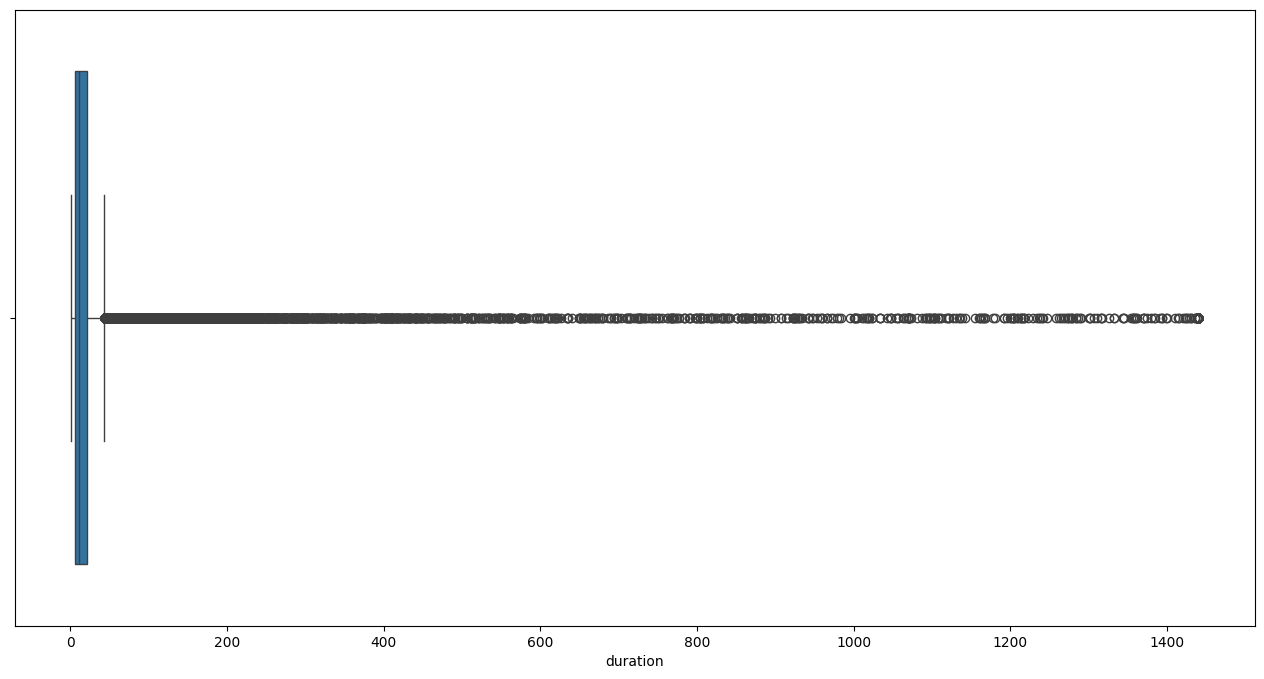

In [17]:
#Finding outliers for duration
plt.figure(figsize=(16, 8))
sns.boxplot(x=metro_data['duration'])

********************
2.6.2 Handling Outliers by calculating Inter Quartile Range for Duration

In [18]:
Q1 = metro_data['duration'].quantile(0.25)
Q3 = metro_data['duration'].quantile(0.75)
IQR = Q3 - Q1
print('Q3: ',Q3)
print('Q1: ',Q1)
print('IQR:',IQR)

Q3:  21.0
Q1:  6.0
IQR: 15.0


********************
2.6.4 calculating upper and lower limit for the IQR

In [19]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 43.5
lower limit: -16.5


********************
2.6.5 Removing Outliers

In [20]:
cleaned_data = metro_data[(metro_data['duration']>= lower_limit) & (metro_data['duration']<= upper_limit)]

- IQR method is suitable method for detecting outliers over normal mean and standard deviation methods.
- IQR uses middle range of data, this method is flexible for larger datasets.

********************
2.6.6 Visualisation of Original and Cleaned Data by boxplot

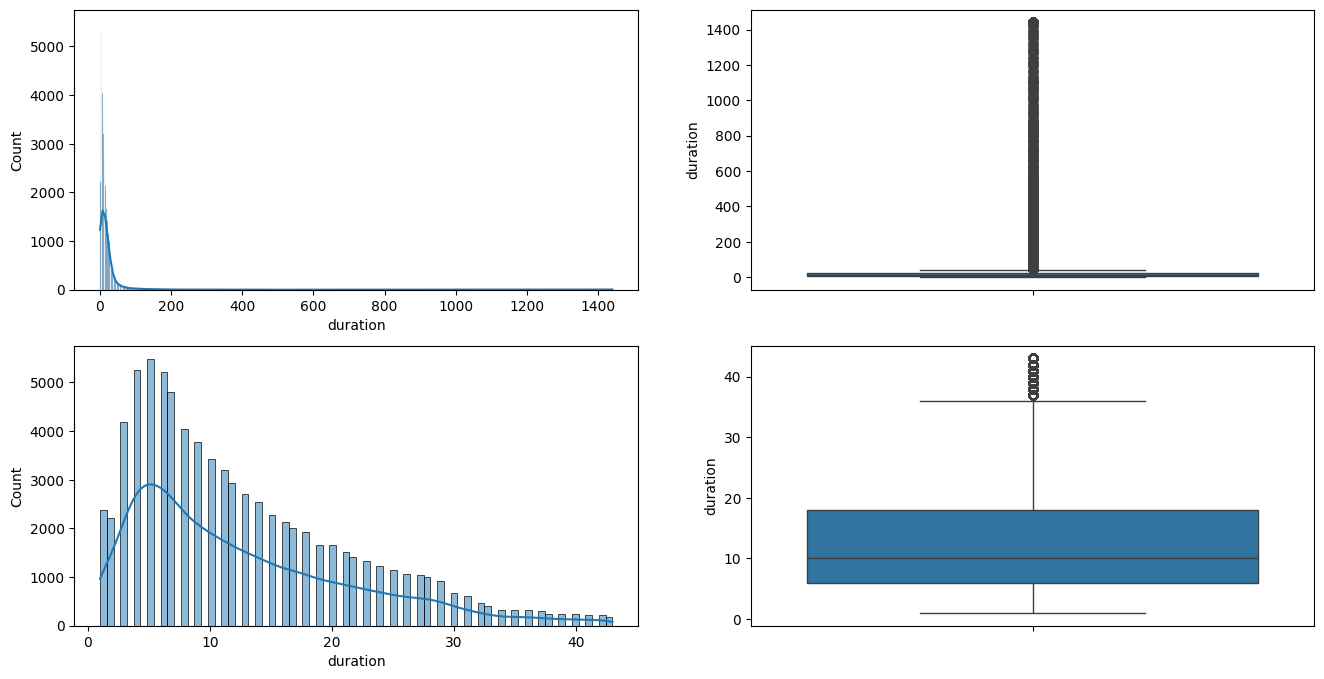

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(metro_data['duration'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = metro_data['duration'])

plt.subplot(2,2,3)
sns.histplot(cleaned_data['duration'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = cleaned_data['duration'])

plt.show()

<hr style="border:1.5px solid black"> </hr>
<h2 style="color:Black;">3. Data Transformation</h2>

*************************************
3.1 Extracting additional timefields from start_time column

In [22]:
# Extract hour and day of the week for more accurate analysis

metro_data['start_hour'] = metro_data['start_time'].dt.hour
metro_data['start_day'] = metro_data['start_time'].dt.day_name().astype('string')

# Checking Dataset
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86760 entries, 0 to 92122
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              86760 non-null  int64         
 1   duration             86760 non-null  int64         
 2   start_time           86760 non-null  datetime64[ns]
 3   end_time             86760 non-null  datetime64[ns]
 4   start_station        86760 non-null  int64         
 5   start_lat            86760 non-null  float64       
 6   start_lon            86760 non-null  float64       
 7   end_station          86760 non-null  int64         
 8   end_lat              86760 non-null  float64       
 9   end_lon              86760 non-null  float64       
 10  bike_id              86760 non-null  string        
 11  plan_duration        86760 non-null  int64         
 12  trip_route_category  86760 non-null  object        
 13  passholder_type      86760 non-null 

- Transformed start_time to start_hour and start_day for better visualisation and displayed the updated timefiels.

*************************************
3.2 Encoding object datatype to categorical datatype

In [23]:
# Encoding categorical variables
metro_data['passholder_type'] = metro_data['passholder_type'].astype('category')
metro_data['trip_route_category'] = metro_data['trip_route_category'].astype('category')
metro_data['bike_type'] = metro_data['bike_type'].astype('category')


metro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86760 entries, 0 to 92122
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              86760 non-null  int64         
 1   duration             86760 non-null  int64         
 2   start_time           86760 non-null  datetime64[ns]
 3   end_time             86760 non-null  datetime64[ns]
 4   start_station        86760 non-null  int64         
 5   start_lat            86760 non-null  float64       
 6   start_lon            86760 non-null  float64       
 7   end_station          86760 non-null  int64         
 8   end_lat              86760 non-null  float64       
 9   end_lon              86760 non-null  float64       
 10  bike_id              86760 non-null  string        
 11  plan_duration        86760 non-null  int64         
 12  trip_route_category  86760 non-null  category      
 13  passholder_type      86760 non-null 

- Encoded trip_route_category, passholder_type, and bike_type to category datatype for better visualisation and displayed the updated dataset.

<hr style="border:1.5px solid black"> </hr>
<h2 style="color:Black;">4. Data Visualisation</h2>

4.1 Count of Trip Duration

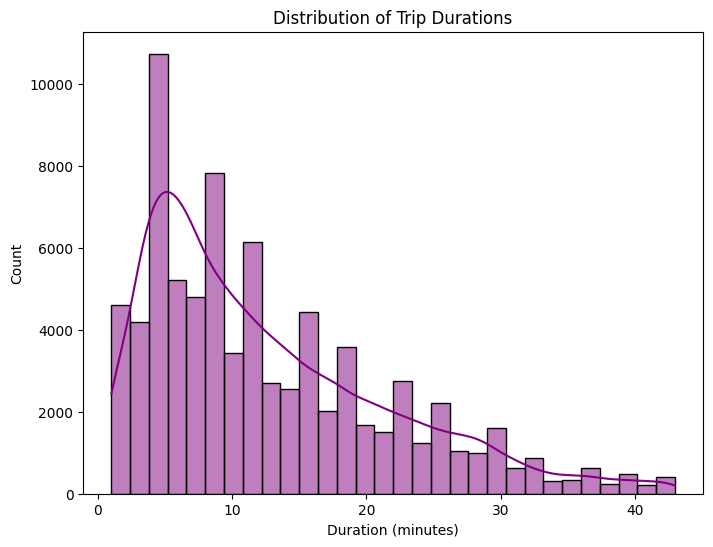

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['duration'], kde=True, bins=30, color='Purple')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.show()

- Above Histogram displays, Majority of the trips are shorter in duration

********************************
4.2 Visualisation for 'Number of Trips per Hour of Day' using countplot

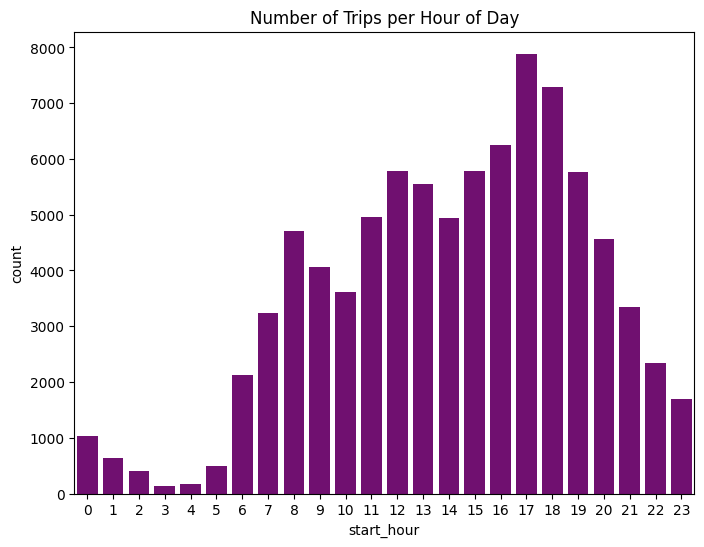

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='start_hour', data=metro_data, color='Purple')
plt.title('Number of Trips per Hour of Day')
plt.xlabel('start_hour')
plt.show()

- Above countplot dispalys, Majority of the trips in a day occurred in the evening hours primarly from 5 to 7 PM

********************************
4.3 Visualisation for 'Trips per Day of the Week' using countplot

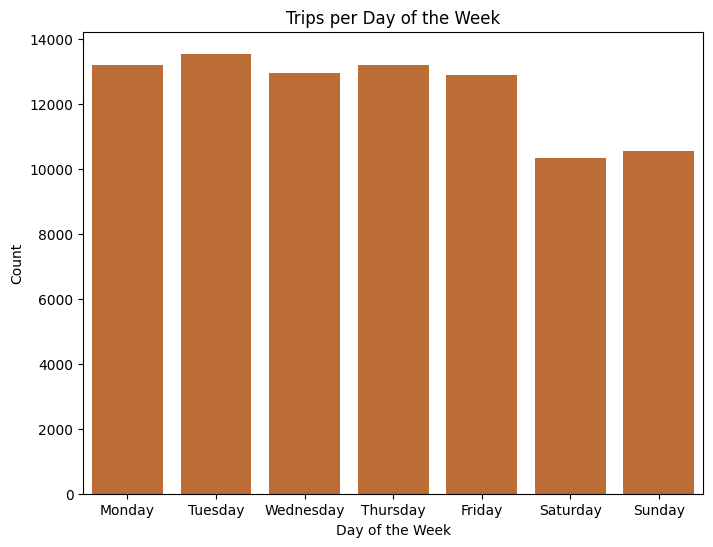

In [26]:

plt.figure(figsize=(8, 6))
sns.countplot(x='start_day', data=metro_data, order=['Monday', 'Tuesday', 'Wednesday', 
                                                     'Thursday', 'Friday', 'Saturday', 'Sunday'], color='Chocolate')
plt.title('Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

- Above countplot dispalys, Majority of the trips occured in weekdays (i.e. Monday to Friday)

********************************
4.4 Visualisation for 'Average Bike Type Category' using barplot

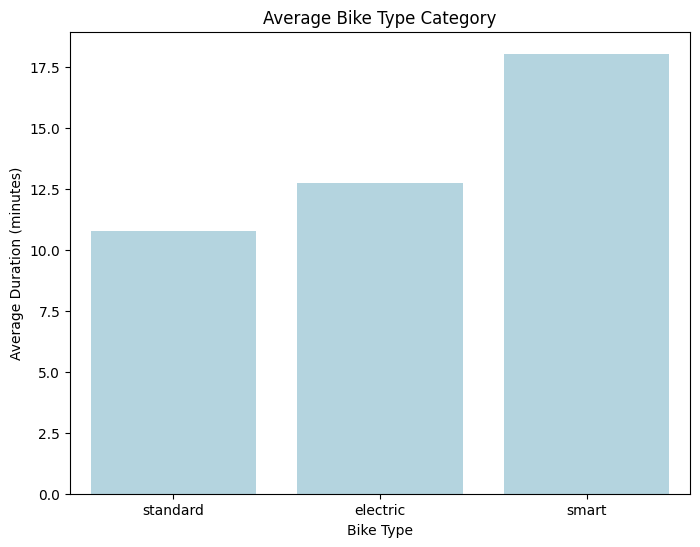

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='bike_type', y='duration', data=cleaned_data, errorbar=None, color='Lightblue')
plt.title('Average Bike Type Category')
plt.xlabel('Bike Type')
plt.ylabel('Average Duration (minutes)')
plt.show()

- Above barplot dispalys, Majority of the users prefer smart bike

********************************
4.5 Visualisation for 'Average trip route category' using barplot

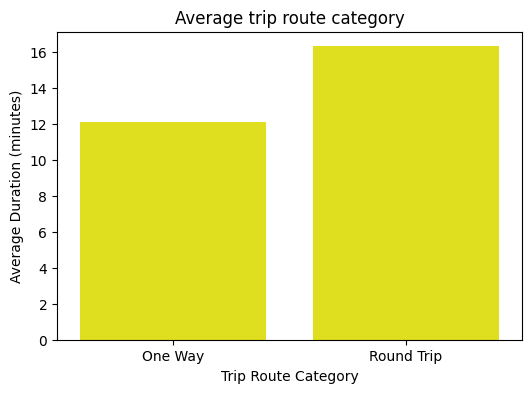

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x='trip_route_category', y='duration', data=cleaned_data, errorbar=None, color='Yellow')
plt.title('Average trip route category')
plt.xlabel('Trip Route Category')
plt.ylabel('Average Duration (minutes)')
plt.show()

- Above barplot dispalys, Majority of the users prefer round trip

********************************
4.6 Visualisation for 'Start latitude and longitude with Duration' using scatterplot

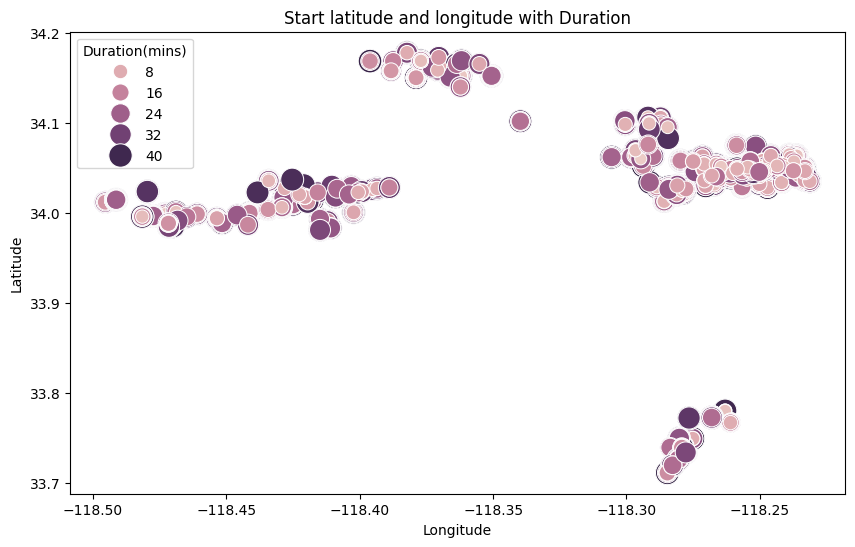

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cleaned_data, x='start_lon', y='start_lat', hue='duration', color = 'red', size='duration', sizes=(70, 300))

# Titles and labels
plt.title('Start latitude and longitude with Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Duration(mins)')

# Plot
plt.show()

- Above scatterplot dispalys, the trips are majorly occured in the 2 locations whicha are clustered towards centre and right of the scatterplot

********************************
4.7 Visualisation for 'Average Trip Duration by Passholder Type' using barplot

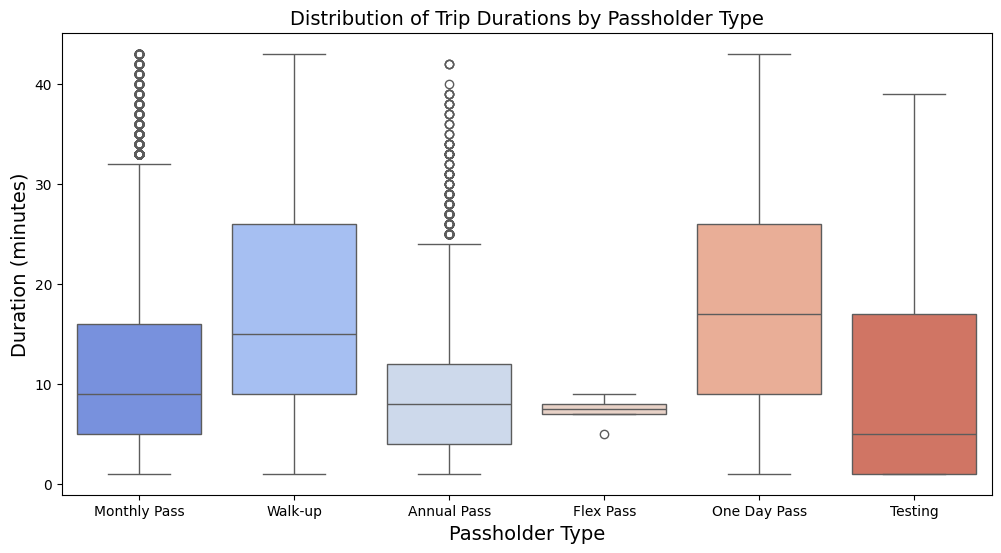

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='passholder_type', y='duration', hue='passholder_type', 
           palette='coolwarm', dodge=False, legend=False)

# Adding titles and labels
plt.title('Distribution of Trip Durations by Passholder Type', fontsize=14)
plt.xlabel('Passholder Type', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)

# Show the plot
plt.show()

- Above barplot dispalys, Majority of the passholders are Walk-up and One day pass users

<hr style="border:1.5px solid black"> </hr>
<h2 style="color:Black;">5. Summary and References</h2>

Summary:

- The dataset consists of ananomysied bike trip data from metro bike share program, key columns analysed are duration, start_time, start_lat, start_lon, passholder_type, trip_route_category and bike_type.
- The dataset contains missing values, which are dropped as the percentage of missing values data is considerably very low (2.3% and 4.4%), so dropping the missing value records for more accurate analysis.
- The dataset also contains outliers in duration column, these are removed using IQR Method. Removing this outliers provided better analysis.
- In the dataset, the datatype of mentioned columns are different, so for start_time and end_time have object as current datatype are converted to time_stamp datatype, and bike_id column has object as datatype, this is converted to string in data cleaning method. Also, 
The trip_route_category, passholder_type and bike_type has object as datatype, tese ares converted to category in data transformation method
- Extracted hour and day of the week for more accurate analysis using start_time.
- Perfomed various exploratory data analysis for the given dataset, found the various findings such as Majority of the passholders are Walk-up and One day pass users, the trips are majorly occured in the 2 locations whicha are clustered towards centre and right of the scatterplot, Majority of the users prefer round trip over one way, Majority of the users prefer smart bike, Majority of the trips occured in weekdays (i.e. Monday to Friday), Majority of the trips in a day occurred in the evening hours primarly from 5 to 7 PM and Majority of the trips are shorter in duration.
- By performing this Exploratory Data analysis on the "Metro.csv" dataset, understood bike share system's operation.s


References:
- National Association of City Transportation Officials. (2021). ‘Shared Micromobility in the U.S.: 2020 Report’. Available at : https://nacto.org/shared-micromobility-2020/ (Accessed: 24-November-2024)
- Anuganti Suresh (Nov 30, 2020) ‘How to Remove Outliers for Machine Learning?’ , Available at : https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8 (Accessed: 25-November-2024)
- Shipra Saxena ( Nov 27, 2024) ‘What are Categorical Data Encoding Methods | Binary Encoding’. Available at :  https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/ (Accessed: 25-November-2024)
- Samantha Knee (Dec 7, 2020) ‘How to Create a Seaborn Palette That Highlights Maximum Value’ Available at : https://medium.com/swlh/how-to-create-a-seaborn-palette-that-highlights-maximum-value-f614aecd706b (Accessed: 28-November-2024)